In [252]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from PoisDenoiser.utils import show_images as show,\
                               show_losses, \
                               do_inference as show_model,\
                               compare_pois_l2,\
                               compare_pois_l2_pois_w_prox as compare

% matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Show losses

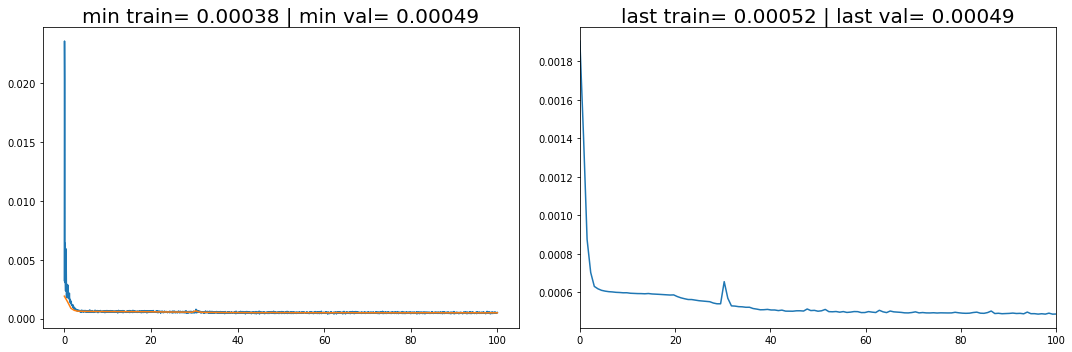

num images =  900
train size = 50, val size = 50


In [253]:
s=5
c=32
model_type = 'pois'
model_name = 'fmd/twophoton/'+model_type+'_w_prox_900/'
exp_name = model_name+'s{}c{}'.format(s,c)
flag_while = 0
log = 0
loglog = 0

last_epochs = 300
only_val = 1

show_losses(flag_while=flag_while, exp_name=exp_name,\
            log=log, loglog=loglog, last_epochs=last_epochs, only_val=only_val)

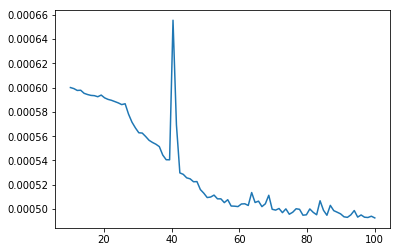

In [255]:
path2model = './PoisDenoiser/networks/PoisNet/models/'
val_losses = np.load(path2model+exp_name+'/val_losses.npy')
epoch = np.load(path2model+exp_name+'/epoch.npy').item()

show_wo_batches = 1
x_left, x_right, num_batches, slice_mult = 10, 850, 1, 1
val_losses = val_losses[:epoch*num_batches]

x_arr = np.linspace(0,epoch, epoch*num_batches)
x_slice = slice(0, len(val_losses))
x_slice = slice(x_left*num_batches, x_right*num_batches)

if show_wo_batches:
    plt.plot(x_arr[x_slice][::slice_mult*num_batches], val_losses[x_slice][::slice_mult*num_batches])
else:
    plt.plot(x_arr[x_slice], val_losses[x_slice])


# Show Inference

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


tensor(25.1919)

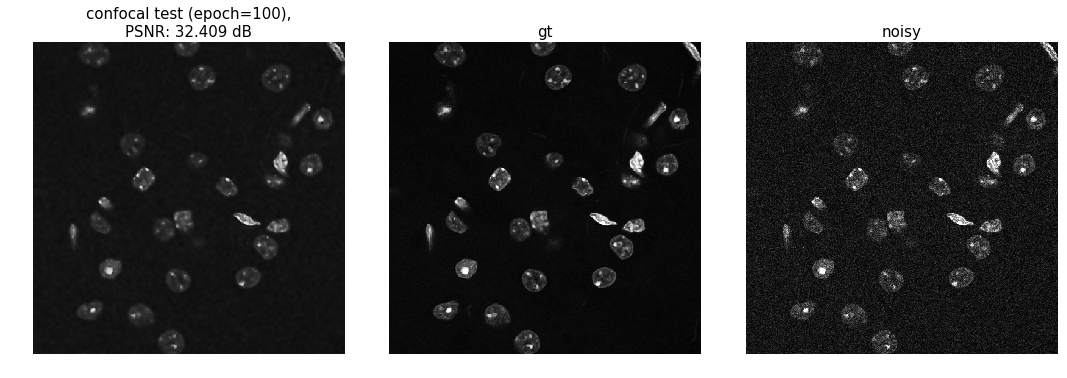

In [256]:
saved_epoch = 100
img_ind = 0

path2valdata = './DATASETS/BSDS500/BSDS500_validation_MAXVALs_01_2/'
path2valdata = './DATASETS/FMD/fmd/twophoton/'

clear_ind = 1
s, c = 5, 32
params_dict = {'s':s, 'c':c, 'img_ind':img_ind, 'saved_epoch':saved_epoch, \
               'path2valdata':path2valdata, 'clear_ind':clear_ind}

model_type = 'pois'
model_name = 'fmd/'+model_type+'_w_prox_900/'
prox_param = True

# from PoisDenoiser.dataset_loader import FMD
# path2data = './DATASETS/FMD/fmd/'
# fmd = FMD(path_to_datafolder=path2data, exp='confocal', trainorval='', get_name=False)

# gt, noisy = fmd[img_ind]
# gt.unsqueeze_(0)
# noisy.unsqueeze_(0)

from glob import glob
import torch as th

path2folder = './DATASETS/FMD/fmd/twophoton/VAL_FULL/'
name = sorted([name[len(path2folder)+3:-4] for name in glob(path2folder+'gt/*.pth')])[0]
gt = th.load(path2folder+'gt/'+name+'.pth')[0]
noisy = th.load(path2folder+'noisy/'+name+'.pth')[0]
gt.unsqueeze_(0).unsqueeze_(0)
noisy.unsqueeze_(0).unsqueeze_(0)

from PoisDenoiser.utils import do_inference_return_lists
%load_ext autoreload
%autoreload 2

exp_name = 'fmd/twophoton/pois_w_prox_900/s5c32/'


estim, title = do_inference_return_lists(noisy.contiguous(), gt.contiguous(), s=5, c=32, exp_name=exp_name, saved_epoch=saved_epoch, \
                                         model_type='pois', app='confocal test', prox_param=prox_param)

show([estim, gt, noisy], [title, 'gt', 'noisy'])

from PoisDenoiser.utils import psnr
psnr(gt, noisy)

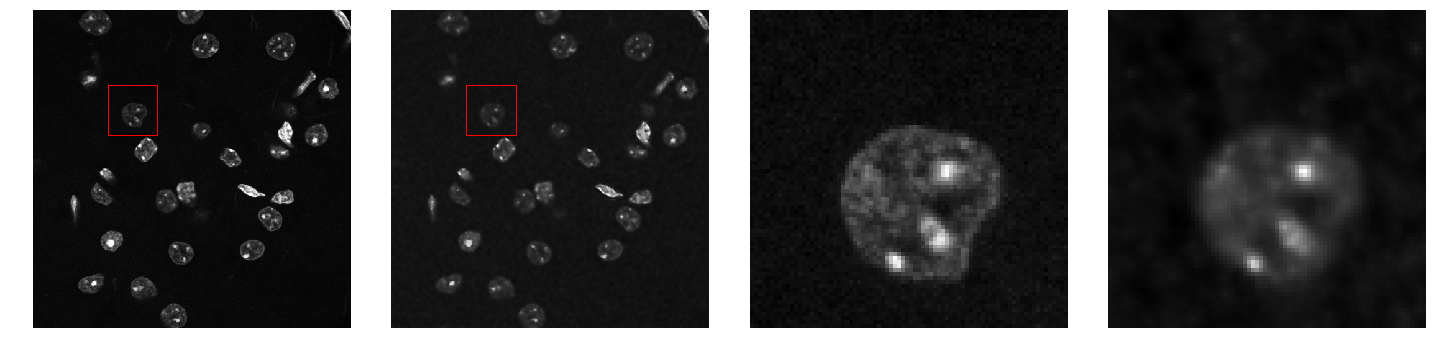

In [258]:
import matplotlib.patches as patches
# Create a Rectangle patch
rect1 = patches.Rectangle((120,120),80,80,linewidth=1,edgecolor='r',facecolor='none')
rect2 = patches.Rectangle((120,120),80,80,linewidth=1,edgecolor='r',facecolor='none')
rect3 = patches.Rectangle((120,120),80,80,linewidth=1,edgecolor='r',facecolor='none')
show([gt, estim, gt[slice_], estim[slice_]], patches=[rect1, rect2, None, None])

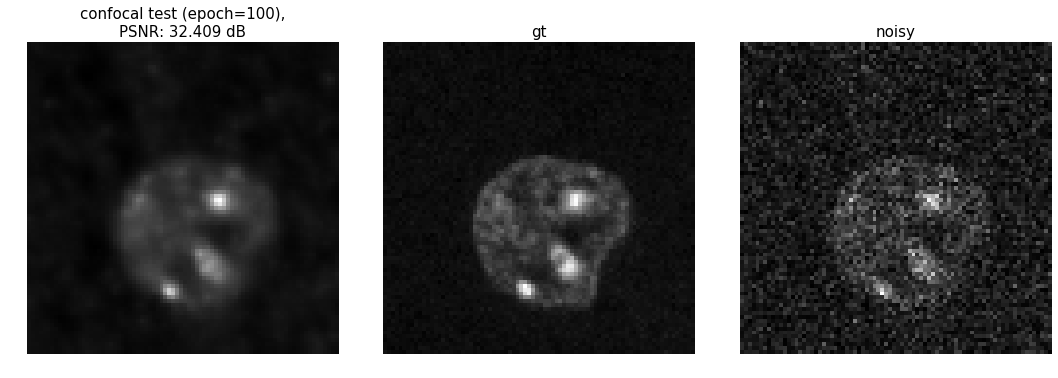

In [259]:
slice_ = (slice(0,1), slice(0,1), slice(120,200), slice(120,200))
show([estim[slice_], 
      gt[slice_], 
      noisy[slice_]
     ], [title, 'gt', 'noisy'])

# FMD 6 images

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


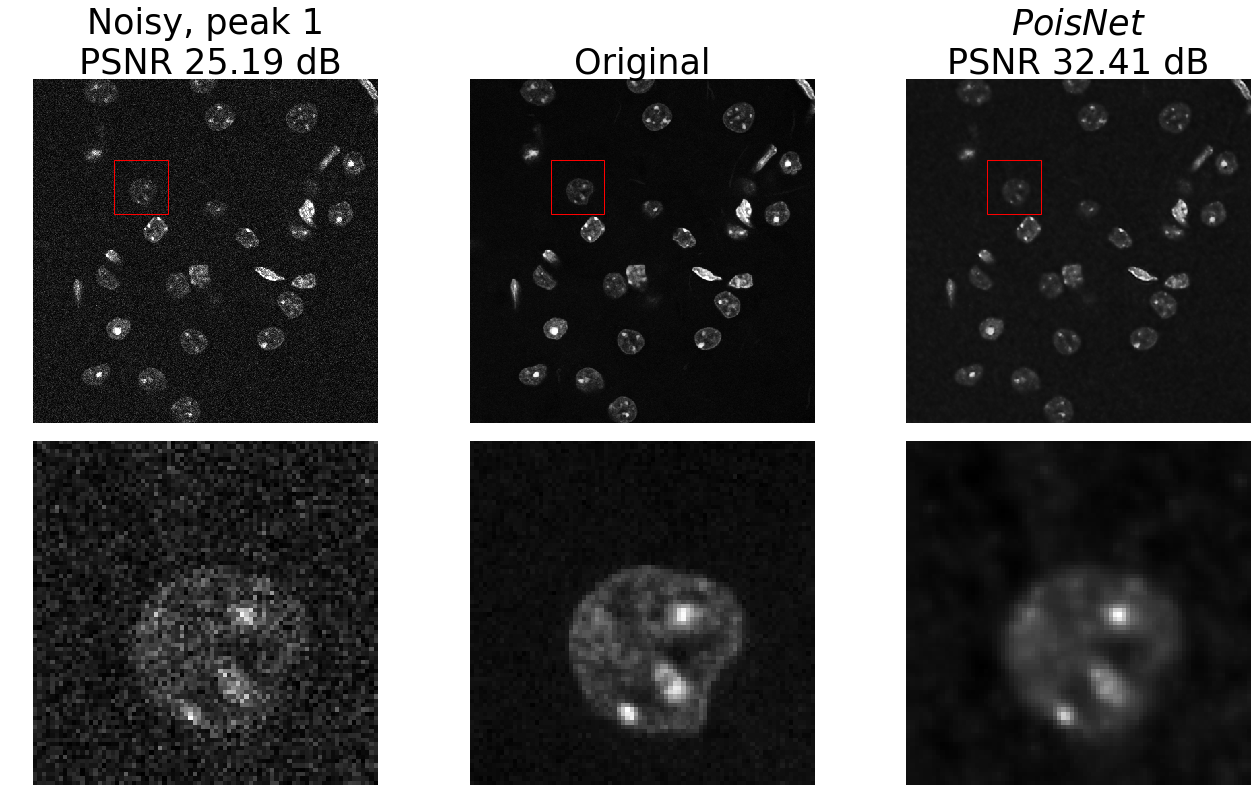

In [260]:
%load_ext autoreload
%autoreload 2

psnr_noisy = psnr(gt, noisy)
psnr_estim = psnr(gt, estim)

images = [noisy, 
          gt,
          estim,
          noisy[slice_], 
          gt[slice_],
          estim[slice_]]

titles = ['Noisy, peak 1\n PSNR {:.2f} dB'.format(psnr_noisy),
          'Original',
          r'$PoisNet$'+'\nPSNR {:.2f} dB'.format(psnr_estim),
          '', '', '']

import matplotlib.patches as patches
# Create a Rectangle patch
rect1 = patches.Rectangle((120,120),80,80,linewidth=1,edgecolor='r',facecolor='none')
rect2 = patches.Rectangle((120,120),80,80,linewidth=1,edgecolor='r',facecolor='none')
rect3 = patches.Rectangle((120,120),80,80,linewidth=1,edgecolor='r',facecolor='none')

patches = [rect1, rect2, rect3, None, None, None]
         
         
# titles =None

# show4h(images, titles, fontsize=35)


from PoisDenoiser.utils import showimages_trdpd as show6
show6(images, titles, patches=patches, fontsize=35)

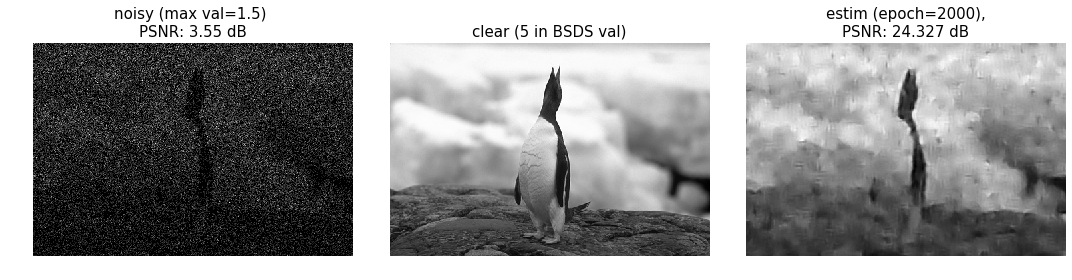

In [183]:
saved_epoch = 2000
img_ind = 5

path2valdata = './DATASETS/BSDS500/BSDS500_validation_MAXVALs_01_2/'

clear_ind = 1
s, c = 5, 32
params_dict = {'s':s, 'c':c, 'img_ind':img_ind, 'saved_epoch':saved_epoch, \
               'path2valdata':path2valdata, 'clear_ind':clear_ind}

model_type = 'pois'
model_name = model_type+'_w_prox_1600_s5c32/'
prox_param = True
show_model(model_type=model_type, exp_name=model_name+'s{}c{}'.format(s,c), \
           prox_param=prox_param, **params_dict)

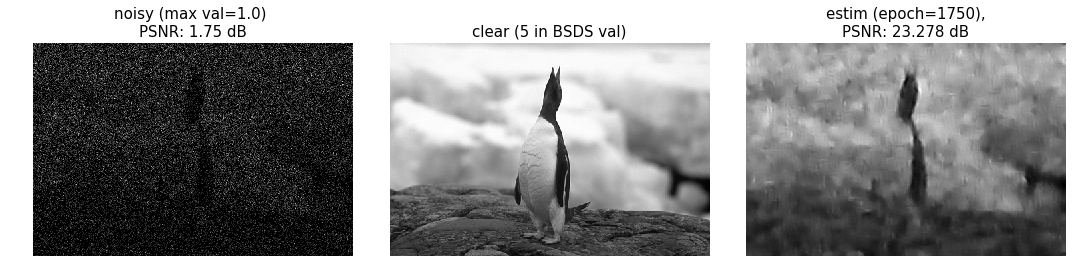

In [89]:
saved_epoch = 1750
img_ind = 5

path2valdata = './DATASETS/BSDS500/BSDS500_validation_PEAK_1/'

clear_ind = 1
s, c = 5, 32
params_dict = {'s':s, 'c':c, 'img_ind':img_ind, 'saved_epoch':saved_epoch, \
               'path2valdata':path2valdata, 'clear_ind':clear_ind}

s, c = 5, 32
model_type = 'pois'
model_name = model_type+'_w_prox_1600_s5c32/'
prox_param = True
show_model(model_type=model_type, exp_name=model_name+'s{}c{}'.format(s,c), \
           prox_param=prox_param, **params_dict)

In [203]:
saved_epoch = 800
img_ind = 5

path2valdata = './DATASETS/FMD/fmd/confocal/VAL_FULL/'

clear_ind = 1
s, c = 5, 32
params_dict = {'s':s, 'c':c, 'img_ind':img_ind, 'saved_epoch':saved_epoch, \
               'path2valdata':path2valdata, 'clear_ind':clear_ind}

model_type = 'pois'
model_name = 'fmd/confocal/'+model_type+'_w_prox_900/'
prox_param = True
show_model(model_type=model_type, exp_name=model_name+'s{}c{}'.format(s,c), \
           prox_param=prox_param, **params_dict)

IndexError: list index out of range

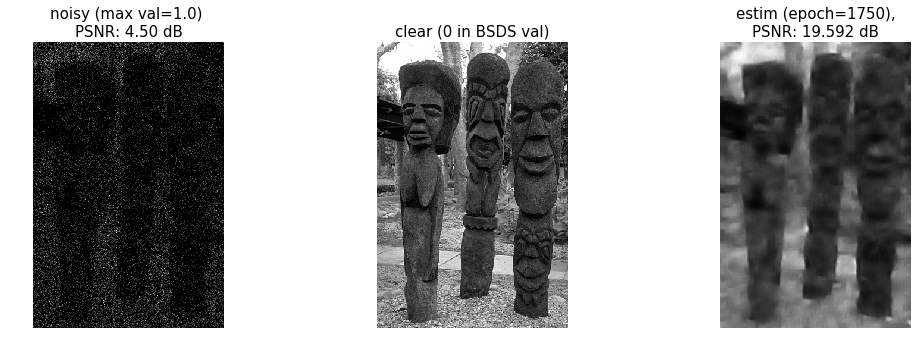

In [40]:
# model_type = 'pois'
# model_name = model_type+'_wo_prox_1600_s5c32/'##'_wo_prox_MSE_400/'
# prox_param = False
# show_model(model_type=model_type, exp_name=model_name+'s{}c{}'.format(s,c), \
#            prox_param=prox_param, **params_dict)

# model_type = 'l2'
# model_name = model_type+'_wo_prox_1600_s5c32/'#'_wo_prox_MSE_400/'
# prox_param = False
# show_model(model_type=model_type, exp_name=model_name+'s{}c{}'.format(s,c), \
#            prox_param=prox_param, **params_dict)



# model_type = 'l2'
# model_name = model_type+'_w_prox_1600_s5c32/'#'_w_prox_MSE_400/'#
# prox_param = True
# show_model(model_type=model_type, exp_name=model_name+'s{}c{}'.format(s,c), \
#            prox_param=prox_param, **params_dict)

# model_type = 'l2'
# model_name = model_type+'_w_prox_MSE_no_sw_400/'
# prox_param, sharing_weights = True, False
# show_model(model_type=model_type, exp_name=model_name+'s{}c{}'.format(s,c), \
#            prox_param=prox_param, sharing_weights=sharing_weights, **params_dict)

# model_type = 'l2'
# model_name = model_type+'_doVST_400/'
# prox_param, sharing_weights = True, True
# do_VST = True
# show_model(model_type=model_type, exp_name=model_name+'s{}c{}'.format(s,c), do_VST=do_VST, \
#            prox_param=prox_param, sharing_weights=sharing_weights, **params_dict)


In [9]:
# for img_ind in tqdm(range(100)):
#     compare(4,32, 600, img_ind)
#     os.makedirs('./different_exps_results/compare_pois_l2_pois_w_proxparam_BSDSval_fullsize/', exist_ok=True)
#     plt.savefig('./different_exps_results/compare_pois_l2_pois_w_proxparam_BSDSval_fullsize/'+\
#                         '{:03d}.png'.format(int(img_ind)))
#     plt.close()

In [210]:
# for img_ind in tqdm(range(100)):
#     s, c = 4, 32
#     saved_epoch = 800
#     compare(s,c,saved_epoch, img_ind)
#     plt.savefig('./different_exps_results/compare_pois_l2_BSDSval_fullsize/'+\
#                         '{:03d}.png'.format(int(img_ind)))
#     plt.close()